In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


from sklearn.preprocessing import LabelEncoder



from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('uber_expl.csv')
df_onehot = pd.read_csv('uber_expl_onehot.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 17 columns):
Unnamed: 0          329140 non-null int64
distance            329140 non-null float64
cab_type            329140 non-null object
destination         329140 non-null object
source              329140 non-null object
price               329140 non-null float64
surge_multiplier    329140 non-null float64
name                329140 non-null object
date                329140 non-null object
hour                329140 non-null int64
minute              329140 non-null int64
temp                329140 non-null float64
clouds              329140 non-null float64
pressure            329140 non-null float64
rain                329140 non-null float64
humidity            329140 non-null float64
wind                329140 non-null float64
dtypes: float64(9), int64(3), object(5)
memory usage: 42.7+ MB


In [4]:
df = df.drop(['Unnamed: 0', 'cab_type','surge_multiplier', 'minute','date'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 12 columns):
distance       329140 non-null float64
destination    329140 non-null object
source         329140 non-null object
price          329140 non-null float64
name           329140 non-null object
hour           329140 non-null int64
temp           329140 non-null float64
clouds         329140 non-null float64
pressure       329140 non-null float64
rain           329140 non-null float64
humidity       329140 non-null float64
wind           329140 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 30.1+ MB


In [6]:
df_la = df.copy()

In [7]:
lb = LabelEncoder()

df_la['destination'] = lb.fit_transform(df_la['destination'])
df_la['source'] = lb.fit_transform(df_la['source'])
df_la['name'] = lb.fit_transform(df_la['name'])


In [8]:
df_la.head()

,distance,destination,source,price,name,hour,temp,clouds,pressure,rain,humidity,wind
0,1.11,11,6,12.0,4,22,38.65,0.96,1017.23,0.0000,0.65,3.13
1,1.11,11,6,16.0,0,10,20.12,0.43,1031.07,0.0000,0.64,3.88
2,1.11,11,6,7.5,3,19,32.75,0.51,1033.75,0.0000,0.57,1.90
3,1.11,11,6,7.5,5,23,42.36,1.00,1012.15,0.2088,0.77,11.46
4,1.11,11,6,26.0,1,0,30.07,0.69,1034.97,0.0000,0.68,1.98


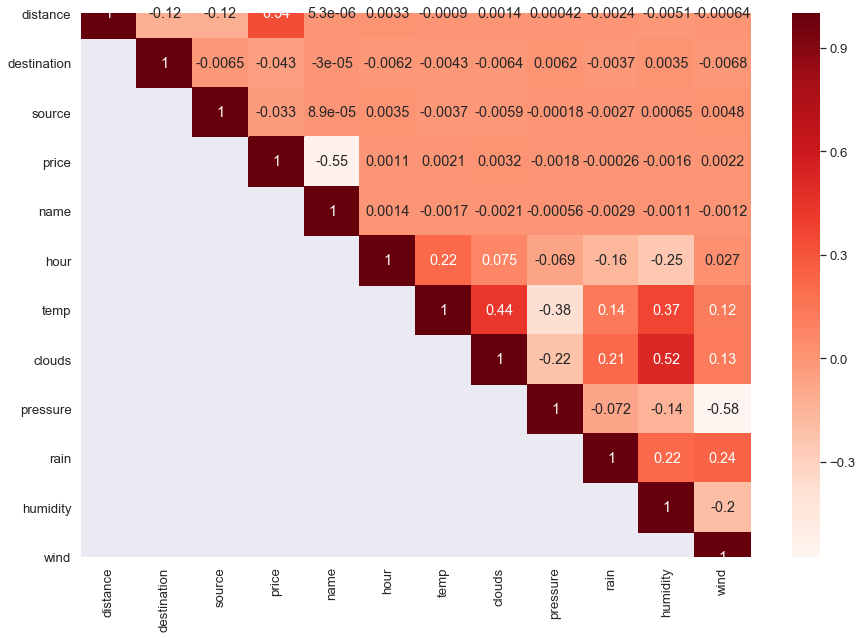

In [9]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
df_la_corr = df_la.corr()
x = np.tri(df_la_corr.shape[0],k=-1)
sns.heatmap(df_la_corr, annot=True, cmap=plt.cm.Reds, mask=x)

plt.show()

# 상관관계가 0.9를 초과하는 피처는 없음.

In [10]:
df_onehot

,Unnamed: 0,distance,price,hour,temp,clouds,pressure,rain,humidity,wind,...,WAV,0,1,2,3,4,5,6,11,12
0,0,1.11,12.0,22,38.65,0.96,1017.23,0.0000,0.65,3.13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1.11,16.0,10,20.12,0.43,1031.07,0.0000,0.64,3.88,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,1.11,7.5,19,32.75,0.51,1033.75,0.0000,0.57,1.90,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,1.11,7.5,23,42.36,1.00,1012.15,0.2088,0.77,11.46,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,1.11,26.0,0,30.07,0.69,1034.97,0.0000,0.68,1.98,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329135,329135,1.00,9.5,23,36.69,0.41,1023.64,0.0000,0.76,2.51,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
329136,329136,1.00,13.0,23,36.69,0.41,1023.64,0.0000,0.76,2.51,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
329137,329137,1.00,9.5,23,36.69,0.41,1023.64,0.0000,0.76,2.51,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
329138,329138,1.00,27.0,23,36.69,0.41,1023.64,0.0000,0.76,2.51,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
df_onehot = df_onehot.drop(['Unnamed: 0'], axis=1)

In [12]:
import statsmodels.api as sm

In [13]:
x = df_onehot.drop('price', axis=1)
y = df_onehot['price'].copy()

In [14]:
x_constant = sm.add_constant(x)
uber_model = sm.OLS(y, x).fit()
uber_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 9.381e+04
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:01:42   Log-Likelihood:            -7.5560e+05
No. Observations:              329140   AIC:                         1.511e+06
Df Residuals:                  329098   BIC:                         1.512e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
distance                         2.5269      0.005    561.174      0.000       2.518       2.536
hour                             0.0005      0.001      0.764      0.445      -0.001       0.002
temp                            -0.0009      0.001     -0.914      0.361      -0.003       0.001
clouds                          -0.0271      0.018     -1.490      0.136      -0.063       0.009
pressure                        -0.0002      0.001     -0.240      0.810      -0.002       0.001
rain                            -0.1829      0.157     -1.165      0.244      -0.491       0.125
humidity                        -0.0087      0.054     -0.161      0.872      -0.115       0.098
wind                             0.0033      0.002      1.881      0.060      -0.000       0.007
dest_Back Bay                    0.8975      0.072     12.450      0.000       0.756       1.039
dest_Beacon Hill                 0.6439      0.072      8.927      0.000       0.503       0.785
dest_Boston University           1.0202      0.072     14.151      0.000       0.879       1.161
dest_Fenway                      0.5788      0.072      8.013      0.000       0.437       0.720
dest_Financial District          1.1125      0.072     15.422      0.000       0.971       1.254
dest_Haymarket Square            1.1776      0.072     16.345      0.000       1.036       1.319
dest_North End                   0.9254      0.072     12.833      0.000       0.784       1.067
dest_North Station               0.9859      0.072     13.687      0.000       0.845       1.127
dest_Northeastern University     0.8939      0.072     12.399      0.000       0.753       1.035
dest_South Station               0.7325      0.072     10.171      0.000       0.591       0.874
dest_Theatre District            1.0340      0.072     14.357      0.000       0.893       1.175
dest_West End                    0.7319      0.072     10.153      0.000       0.591       0.873
src_Back Bay                     0.7500      0.072     10.410      0.000       0.609       0.891
src_Beacon Hill                  0.5327      0.072      7.392      0.000       0.391       0.674
src_Boston University            0.6507      0.072      9.020      0.000       0.509       0.792
src_Fenway                       0.7189      0.072      9.963      0.000       0.577       0.860
src_Financial District           1.1968      0.072     16.588      0.000       1.055       1.338
src_Haymarket Square             1.3165      0.072     18.217      0.000       1.175       1.458
src_North End                    1.3784      0.072     19.128      0.000       1.237       1.520
src_North Station                0.9303      0.072     12.915      0.000       0.789       1.071
src_Northeastern University      0.4162      0.072      5.770      0.000    

In [15]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
counter=0
while (len(cols)>0):
    p= []
    counter+=1

    X_1 = df_onehot[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
#     print(counter)
#     print(len(pd.Series(model.pvalues.values)))
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
#         print('inside')
        cols.remove(feature_with_p_max)
    else:
        break
    print(feature_with_p_max)
#     print(len(cols))
selected_features_BE = cols
print(selected_features_BE)

humidity
pressure
hour
temp
rain
['distance', 'clouds', 'wind', 'dest_Back Bay', 'dest_Beacon Hill', 'dest_Boston University', 'dest_Fenway', 'dest_Financial District', 'dest_Haymarket Square', 'dest_North End', 'dest_North Station', 'dest_Northeastern University', 'dest_South Station', 'dest_Theatre District', 'dest_West End', 'src_Back Bay', 'src_Beacon Hill', 'src_Boston University', 'src_Fenway', 'src_Financial District', 'src_Haymarket Square', 'src_North End', 'src_North Station', 'src_Northeastern University', 'src_South Station', 'src_Theatre District', 'src_West End', 'Black', 'Black SUV', 'UberPool', 'UberX', 'UberXL', 'WAV', '0', '1', '2', '3', '4', '5', '6', '11', '12']


In [16]:
len(selected_features_BE)

42

In [17]:
x_back = x[selected_features_BE].copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_back, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [123]:
# Backward Elimination을 통해 피처를 선택후 선형회귀 

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

train_pred = lin_reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)


predicted = lin_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

lin_reg_back = {}
lin_reg_back['Train'] = round(train_rmse,4)
lin_reg_back['Test'] = round(test_rmse, 4)
lin_reg_back


Train score :  2.4019277557501
Test score :  2.4058716417170376


{'Train': 2.4019, 'Test': 2.4059}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [21]:
seed = 0

max_depth : 2
Train score    : 4.1425   Test score    : 4.1338
max_depth : 3
Train score    : 3.0161   Test score    : 3.0107
max_depth : 4
Train score    : 2.3851   Test score    : 2.3887
max_depth : 5
Train score    : 2.0971   Test score    : 2.1008
max_depth : 6
Train score    : 1.9976   Test score    : 2.0064
max_depth : 7
Train score    : 1.942   Test score    : 1.9593
max_depth : 8
Train score    : 1.9053   Test score    : 1.9614
max_depth : 9
Train score    : 1.8759   Test score    : 1.956
max_depth : 10
Train score    : 1.8442   Test score    : 1.9617
max_depth : 11
Train score    : 1.8126   Test score    : 1.9782
max_depth : 12
Train score    : 1.7759   Test score    : 1.9996
max_depth : 13
Train score    : 1.7369   Test score    : 2.0188
max_depth : 14
Train score    : 1.6944   Test score    : 2.0557
max_depth : 15
Train score    : 1.6516   Test score    : 2.079


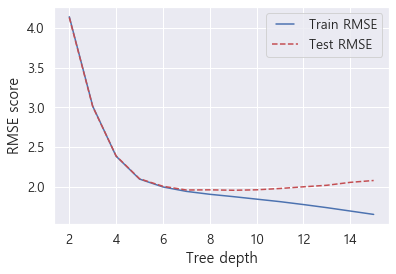

Wall time: 23.8 s


In [59]:
%%time
# 결정트리 파라미터 튜닝

train_results = []
test_results = []

max_depth = range(2,16)

for i in max_depth:
        
    print("max_depth : {}".format(i))

    dtree = DecisionTreeRegressor(criterion = "mse", 
                                  max_depth=i,
                                 random_state=seed)

    dtree.fit(X_train, y_train)    
    

    train_pred = dtree.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    predicted = dtree.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
    
    print("Train score    : {}   Test score    : {}".format(round(train_rmse,4), round(test_rmse,4)))
            
    train_results.append(train_rmse)
    test_results.append(test_rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depth, test_results, 'r--', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Tree depth')
plt.show()    


In [124]:
dtree = DecisionTreeRegressor(criterion = "mse", 
                                  max_depth=7,
                                 random_state=seed)

dtree.fit(X_train, y_train)


train_pred = dtree.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

predicted = dtree.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))

dt_reg_pt = {}
dt_reg_pt['Train'] = round(train_rmse,4)
dt_reg_pt['Test'] = round(test_rmse, 4)

print("Train score    : {}   Test score    : {}".format(round(train_rmse,4), round(test_rmse,4)))

Train score    : 1.942   Test score    : 1.9593


In [75]:
# 랜덤포레스트 파라미터 튜닝

n_estimators = [50, 100]
max_features = ['sqrt', 'log2']
max_depth = range(3,16)

In [76]:
%%time

for i in n_estimators:
    
    print("n_estimatror : ", i)
    
    for j in max_depth:

        print("max_depth : ", j)

        rfc=RandomForestRegressor(random_state=0, n_estimators= i, max_depth=j)

        rfc.fit(X_train, y_train)

        train_pred = rfc.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', train_rmse)

        predicted = rfc.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)


n_estimatror :  50
max_depth :  3
Train score :  2.989390014337334
Test score :  2.9842383452273324
max_depth :  4
Train score :  2.370876401062012
Test score :  2.3742990228565586
max_depth :  5
Train score :  2.08901070291979
Test score :  2.092786642829623
max_depth :  6
Train score :  1.9879034749020654
Test score :  1.9973767902667414
max_depth :  7
Train score :  1.929775011275022
Test score :  1.9459153547502144
max_depth :  8
Train score :  1.8917294903868525
Test score :  1.9214638656197376
max_depth :  9
Train score :  1.8580020800234123
Test score :  1.9099735764494221
max_depth :  10
Train score :  1.8224945833834556
Test score :  1.9061212963452305
max_depth :  11
Train score :  1.7843626423662093
Test score :  1.904801995157338
max_depth :  12
Train score :  1.7435238855445634
Test score :  1.906201669933841
max_depth :  13
Train score :  1.6982589155054237
Test score :  1.9091913982052313
max_depth :  14
Train score :  1.6502587861196631
Test score :  1.91412936291545
ma

In [125]:
%%time
# 랜덤 포레스트

rf = RandomForestRegressor(n_estimators=100, max_depth=9, random_state = seed)

rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

rf_reg_pt = {}
rf_reg_pt['Train'] = round(train_rmse,4)
rf_reg_pt['Test'] = round(test_rmse, 4)
rf_reg_pt

Train score :  1.8579046847596514
Test score :  1.9090489905889252
Wall time: 2min 7s


{'Train': 1.8579, 'Test': 1.909}

In [69]:
feature_im = rfc.feature_importances_

In [70]:
feature_im

array([1.46265258e-01, 3.22147850e-03, 5.57762709e-03, 3.79789050e-03,
       5.00341368e-03, 1.24073333e-03, 3.73524772e-03, 5.42796961e-03,
       6.74829366e-04, 3.10065741e-04, 3.75555169e-04, 3.32833554e-04,
       5.74761377e-04, 1.87680162e-04, 3.50768073e-04, 3.71043793e-04,
       2.47276608e-04, 3.17803918e-04, 2.52422518e-04, 2.88535959e-04,
       6.71051714e-04, 8.29994126e-04, 5.22832067e-04, 3.23571549e-04,
       3.43054064e-04, 9.66342791e-05, 3.28613738e-04, 1.91730235e-04,
       3.57336252e-04, 2.09818112e-04, 1.82570877e-04, 2.82478982e-04,
       1.66892996e-01, 5.78086062e-01, 1.90209143e-03, 3.98101590e-04,
       6.72430491e-02, 3.97111137e-04, 3.37601972e-04, 1.85605816e-04,
       1.62675535e-04, 2.56926495e-04, 2.34474384e-04, 3.50016474e-04,
       2.48475508e-04, 2.01909041e-04, 2.10023810e-04])

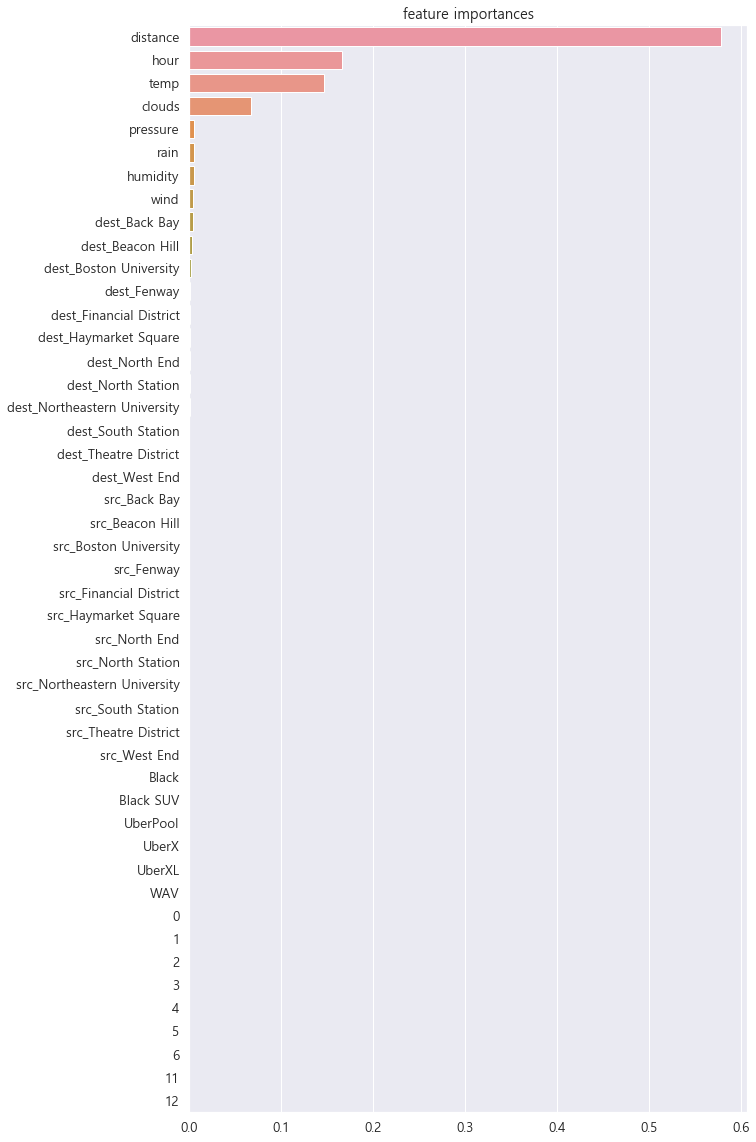

In [73]:
ft_importance = pd.Series(feature_im, index = X_train.columns)
ft_importance = ft_importance.sort_values(ascending = False)

plt.figure(figsize = (10,20))
plt.title("feature importances")
sns.barplot(x=ft_importance, y=X_train.columns)
plt.show()

In [86]:
loss = ['linear', 'square', 'exponential']
learning_rate = [0.01,0.05,0.1,0.3,1]

In [89]:
%%time
# 에이다 부스트 파라미터 튜닝

for i in loss:
    
    print("loss function : ", i)
    
    for j in learning_rate:
        
        print("learning rate : ", j)

        adar = AdaBoostRegressor(loss= i, learning_rate = j, random_state=seed)

        adar.fit(X_train, y_train)

        train_pred = adar.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', round(train_rmse,4))

        predicted = adar.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', round(test_rmse,4))
        

loss function :  linear
learning rate :  0.01
Train score :  3.0172
Test score :  3.0171
learning rate :  0.05
Train score :  2.9996
Test score :  2.9995
learning rate :  0.1
Train score :  3.0136
Test score :  3.015
learning rate :  0.3
Train score :  3.78
Test score :  3.7934
learning rate :  1
Train score :  6.079
Test score :  6.0853
loss function :  square
learning rate :  0.01
Train score :  3.0081
Test score :  3.0037
learning rate :  0.05
Train score :  2.9525
Test score :  2.9528
learning rate :  0.1
Train score :  3.1235
Test score :  3.1308
learning rate :  0.3
Train score :  3.8826
Test score :  3.8923
learning rate :  1
Train score :  6.2083
Test score :  6.2121
loss function :  exponential
learning rate :  0.01
Train score :  3.0172
Test score :  3.0171
learning rate :  0.05
Train score :  2.9752
Test score :  2.9738
learning rate :  0.1
Train score :  3.0694
Test score :  3.0708
learning rate :  0.3
Train score :  3.7457
Test score :  3.7594
learning rate :  1
Train scor

In [126]:
# 에이다 부스트

adar = AdaBoostRegressor(loss= 'square', learning_rate = 0.05, random_state=seed)

adar.fit(X_train, y_train)

train_pred = adar.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = adar.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

ada_reg_pt = {}
ada_reg_pt['Train'] = round(train_rmse,4)
ada_reg_pt['Test'] = round(test_rmse, 4)
ada_reg_pt

Train score :  2.9524648435596577
Test score :  2.9527832915583603


{'Train': 2.9525, 'Test': 2.9528}

In [93]:
n_estimators = [100,200,300];
learning_r = [0.01, 0.05, 0.1,0.5,1]

In [95]:
%%time
# 그레디언트 부스트 파라미터 튜닝

for i in n_estimators:
    
    print("n_estimator : ", i)
    
    
    for j in learning_r:
        
        print("learning rate : ", j)
        
        gbr = GradientBoostingRegressor(n_estimators= i, learning_rate=j, random_state=seed)

        gbr.fit(X_train, y_train)

        train_pred = gbr.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ',train_rmse)

        predicted = gbr.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)
        

n_estimator :  100
learning rate :  0.01
Train score :  4.104024497002963
Test score :  4.097114269248689
learning rate :  0.05
Train score :  2.0115692583005385
Test score :  2.019392768947127
learning rate :  0.1
Train score :  1.935562767281448
Test score :  1.9457845139493224
learning rate :  0.5
Train score :  1.8759052217388492
Test score :  1.9000230459521132
learning rate :  1
Train score :  1.8713758548806962
Test score :  1.901318792504886
n_estimator :  200
learning rate :  0.01
Train score :  2.771073194061869
Test score :  2.76946732260779
learning rate :  0.05
Train score :  1.9347437989513665
Test score :  1.9443431175497519
learning rate :  0.1
Train score :  1.9014629100702984
Test score :  1.9144396762863392
learning rate :  0.5
Train score :  1.8485354488244123
Test score :  1.8864488749020483
learning rate :  1
Train score :  1.8357725739977817
Test score :  1.8897034345025105
n_estimator :  300
learning rate :  0.01
Train score :  2.280914882170824
Test score :  2.

In [127]:
# 그래디언트 부스트

gbr = GradientBoostingRegressor(n_estimators= 300, learning_rate=0.5,random_state=seed)

gbr.fit(X_train, y_train)

train_pred = gbr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ',train_rmse)

predicted = gbr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

gbr_reg_pt = {}
gbr_reg_pt['Train'] = round(train_rmse,4)
gbr_reg_pt['Test'] = round(test_rmse, 4)
gbr_reg_pt

Train score :  1.8306996849699075
Test score :  1.8810461321880882


{'Train': 1.8307, 'Test': 1.881}

In [99]:
max_depth = range(2,11)
learning_r = [0.01, 0.05, 0.1,0.5,1]
gamma = [0,0.1,0.3,0.5]


In [105]:
%%time
# XGBoost 파라미터 튜닝

for i in max_depth:
    
    print("max_depth : ", i)
        
    for j in learning_r:

        print("learning rate : ", j)

        xbr = XGBRegressor(max_depth = i, learning_rate= j, random_state=seed)

        xbr.fit(X_train, y_train)

        train_pred = xbr.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', train_rmse)

        predicted = xbr.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)

max_depth :  2
learning rate :  0.01
Train score :  7.426901021730249
Test score :  7.420485989272813
learning rate :  0.05
Train score :  2.343858614083587
Test score :  2.345531093552486
learning rate :  0.1
Train score :  2.008690432525576
Test score :  2.0167716480863573
learning rate :  0.5
Train score :  1.9533133332720316
Test score :  1.9654717588252828
learning rate :  1
Train score :  1.9407982406853843
Test score :  1.9555552254334156
max_depth :  3
learning rate :  0.01
Train score :  6.941811115765451
Test score :  6.939534835509294
learning rate :  0.05
Train score :  2.0099498483613343
Test score :  2.0181505349110647
learning rate :  0.1
Train score :  1.9369029895413552
Test score :  1.9468776409001278
learning rate :  0.5
Train score :  1.8785300213750094
Test score :  1.9046850129690749
learning rate :  1
Train score :  1.8758551953400588
Test score :  1.904022236315871
max_depth :  4
learning rate :  0.01
Train score :  6.749262536729274
Test score :  6.751449505364

In [130]:
%%time
xbr = XGBRegressor(max_depth = 7, learning_rate= 0.5, random_state=seed)

xbr.fit(X_train, y_train)

train_pred = xbr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = xbr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

xbr_reg_pt = {}
xbr_reg_pt['Train'] = round(train_rmse,4)
xbr_reg_pt['Test'] = round(test_rmse, 4)
xbr_reg_pt

Train score :  1.6426843071888533
Test score :  1.8622668461990872
Wall time: 1min 6s


{'Train': 1.6427, 'Test': 1.8623}

In [120]:
iterations= [10,30,50,100,1000, 5000]
depth= range(1, 8)
learning_r= [0.01, 0.05, 0.1, 0.5, 1]
#random_strength= 
#bagging_temperature= 
#border_count= 
l2_leaf_reg= [1,2,3,4,5,6,7,8,9,10]
#scale_pos_weight=

In [121]:
%%time

# Cat부스트 파라미터 튜닝

for i in iterations:
    
    print("iterations : ", i)
        
    for j in l2_leaf_reg:

        print("l2_leaf_reg : ", j)
    
        cab=CatBoostRegressor(l2_leaf_reg= j, iterations=i,
                              depth=6, learning_rate=0.5,
                              verbose=400, random_state=seed)

        cab.fit(X_train, y_train,
                  eval_set=(X_test, y_test))

        train_pred = cab.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', train_rmse)

        predicted = cab.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)


iterations :  10
l2_leaf_reg :  1
0:	learn: 4.7403005	test: 4.7298625	best: 4.7298625 (0)	total: 26ms	remaining: 234ms
9:	learn: 1.9520231	test: 1.9627361	best: 1.9627361 (9)	total: 257ms	remaining: 0us

bestTest = 1.962736064
bestIteration = 9

Train score :  1.952023140183612
Test score :  1.9627360636027573
l2_leaf_reg :  2
0:	learn: 4.7406448	test: 4.7302084	best: 4.7302084 (0)	total: 57.4ms	remaining: 516ms
9:	learn: 1.9483172	test: 1.9580740	best: 1.9580740 (9)	total: 340ms	remaining: 0us

bestTest = 1.958074032
bestIteration = 9

Train score :  1.948317232847401
Test score :  1.9580740320511771
l2_leaf_reg :  3
0:	learn: 4.7409889	test: 4.7305542	best: 4.7305542 (0)	total: 27.5ms	remaining: 248ms
9:	learn: 1.9484185	test: 1.9581484	best: 1.9581484 (9)	total: 265ms	remaining: 0us

bestTest = 1.958148388
bestIteration = 9

Train score :  1.948418511733918
Test score :  1.958148387705306
l2_leaf_reg :  4
0:	learn: 4.7413330	test: 4.7309000	best: 4.7309000 (0)	total: 26.9ms	remainin

Train score :  1.869932484074751
Test score :  1.8914657810044908
l2_leaf_reg :  8
0:	learn: 4.7427087	test: 4.7322823	best: 4.7322823 (0)	total: 26.2ms	remaining: 1.28s
49:	learn: 1.8691393	test: 1.8890867	best: 1.8890867 (49)	total: 1.23s	remaining: 0us

bestTest = 1.88908669
bestIteration = 49

Train score :  1.869139329231912
Test score :  1.889086689845389
l2_leaf_reg :  9
0:	learn: 4.7430525	test: 4.7326277	best: 4.7326277 (0)	total: 30.2ms	remaining: 1.48s
49:	learn: 1.8690650	test: 1.8900822	best: 1.8900822 (49)	total: 1.27s	remaining: 0us

bestTest = 1.89008221
bestIteration = 49

Train score :  1.8690649532266976
Test score :  1.8900822102475288
l2_leaf_reg :  10
0:	learn: 4.7433961	test: 4.7329730	best: 4.7329730 (0)	total: 24.9ms	remaining: 1.22s
49:	learn: 1.8702475	test: 1.8897035	best: 1.8895734 (48)	total: 1.2s	remaining: 0us

bestTest = 1.889573446
bestIteration = 48

Shrink model to first 49 iterations.
Train score :  1.8711429605439422
Test score :  1.889573446199580

Train score :  1.6931150981697403
Test score :  1.8578083881170406
l2_leaf_reg :  9
0:	learn: 4.7430525	test: 4.7326277	best: 4.7326277 (0)	total: 31.8ms	remaining: 31.8s
400:	learn: 1.7551043	test: 1.8582771	best: 1.8582771 (400)	total: 9.87s	remaining: 14.7s
800:	learn: 1.6928074	test: 1.8577943	best: 1.8570489 (608)	total: 19.7s	remaining: 4.89s
999:	learn: 1.6696282	test: 1.8565170	best: 1.8560750 (959)	total: 24.8s	remaining: 0us

bestTest = 1.856074974
bestIteration = 959

Shrink model to first 960 iterations.
Train score :  1.673734806026806
Test score :  1.8560749740801499
l2_leaf_reg :  10
0:	learn: 4.7433961	test: 4.7329730	best: 4.7329730 (0)	total: 27.9ms	remaining: 27.9s
400:	learn: 1.7567876	test: 1.8584905	best: 1.8578069 (380)	total: 9.8s	remaining: 14.6s
800:	learn: 1.6966754	test: 1.8549485	best: 1.8549485 (800)	total: 19.3s	remaining: 4.8s
999:	learn: 1.6735911	test: 1.8563155	best: 1.8549485 (800)	total: 24s	remaining: 0us

bestTest = 1.854948502
bestIteration = 800

Train score :  1.6854757086775431
Test score :  1.8573052135598616
l2_leaf_reg :  6
0:	learn: 4.7420210	test: 4.7315913	best: 4.7315913 (0)	total: 29.2ms	remaining: 2m 25s
400:	learn: 1.7491537	test: 1.8631163	best: 1.8620260 (368)	total: 10.1s	remaining: 1m 55s
800:	learn: 1.6833840	test: 1.8593754	best: 1.8591668 (780)	total: 20s	remaining: 1m 44s
1200:	learn: 1.6359688	test: 1.8617797	best: 1.8591668 (780)	total: 29.9s	remaining: 1m 34s
1600:	learn: 1.5998105	test: 1.8658420	best: 1.8591668 (780)	total: 39.9s	remaining: 1m 24s
2000:	learn: 1.5706566	test: 1.8716081	best: 1.8591668 (780)	total: 49.9s	remaining: 1m 14s
2400:	learn: 1.5456146	test: 1.8765432	best: 1.8591668 (780)	total: 59.9s	remaining: 1m 4s
2800:	learn: 1.5225328	test: 1.8822232	best: 1.8591668 (780)	total: 1m 9s	remaining: 54.8s
3200:	learn: 1.5025764	test: 1.8867249	best: 1.8591668 (780)	total: 1m 19s	remaining: 44.8s
3600:	learn: 1.4841230	test: 1.8920352	best: 1.8591668 (780)	total: 1m 29s	remaining: 34.9s
4000:	

In [128]:
# Cat부스트

cab=CatBoostRegressor(l2_leaf_reg= 10, iterations=800,
                              depth=6, learning_rate=0.5,
                              verbose=400, random_state=seed)

cab.fit(X_train, y_train,
          eval_set=(X_test, y_test))

train_pred = cab.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = cab.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

cat_reg_pt = {}
cat_reg_pt['Train'] = round(train_rmse,4)
cat_reg_pt['Test'] = round(test_rmse, 4)
cat_reg_pt

0:	learn: 4.7433961	test: 4.7329730	best: 4.7329730 (0)	total: 28.6ms	remaining: 22.9s
400:	learn: 1.7567876	test: 1.8584905	best: 1.8578069 (380)	total: 10.7s	remaining: 10.7s
799:	learn: 1.6967733	test: 1.8551623	best: 1.8549865 (741)	total: 21.4s	remaining: 0us

bestTest = 1.854986491
bestIteration = 741

Shrink model to first 742 iterations.
Train score :  1.7039606266940484
Test score :  1.8549864910404081


{'Train': 1.704, 'Test': 1.855}

In [131]:
final_results_pt = pd.DataFrame([lin_reg_back,
                              dt_reg_pt,
                              rf_reg_pt,
                              ada_reg_pt,
                              gbr_reg_pt,
                              xbr_reg_pt,
                              cat_reg_pt],                             
                            index=['Linear Regression',
                                   'Decision Tree',
                                   'Random Forest',
                                   'Ada Boost',
                                   'Gradient Boost',
                                   'Xg Boost',
                                   'Cat Boost'])
final_results_pt

,Train,Test
Linear Regression,2.4019,2.4059
Decision Tree,1.9420,1.9593
Random Forest,1.8579,1.9090
Ada Boost,2.9525,2.9528
Gradient Boost,1.8307,1.8810
Xg Boost,1.6427,1.8623
Cat Boost,1.7040,1.8550
